In [36]:
#import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import dateutil
import datetime

%matplotlib inline

In [37]:
#Read Dataset (Chicago_Motor_Thefts)

df = pd.read_csv('Data/Chicago_Crime_Detective.csv',index_col=0)
df.head()

C:\Users\Harshavardhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [38]:
#Parse Date column as DatetimeObject
df['Date'] = df['Date'].apply(dateutil.parser.parse,dayfirst=True)
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [39]:
#List out all Data Types
df.dtypes

ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [40]:
#List out More info on Each Variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191641 entries, 0 to 191640
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   191641 non-null  int64         
 1   Date                 191641 non-null  datetime64[ns]
 2   LocationDescription  191641 non-null  object        
 3   Arrest               191641 non-null  bool          
 4   Domestic             191641 non-null  bool          
 5   Beat                 191641 non-null  int64         
 6   District             148589 non-null  object        
 7   CommunityArea        167038 non-null  object        
 8   Year                 191641 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(3), object(3)
memory usage: 12.1+ MB


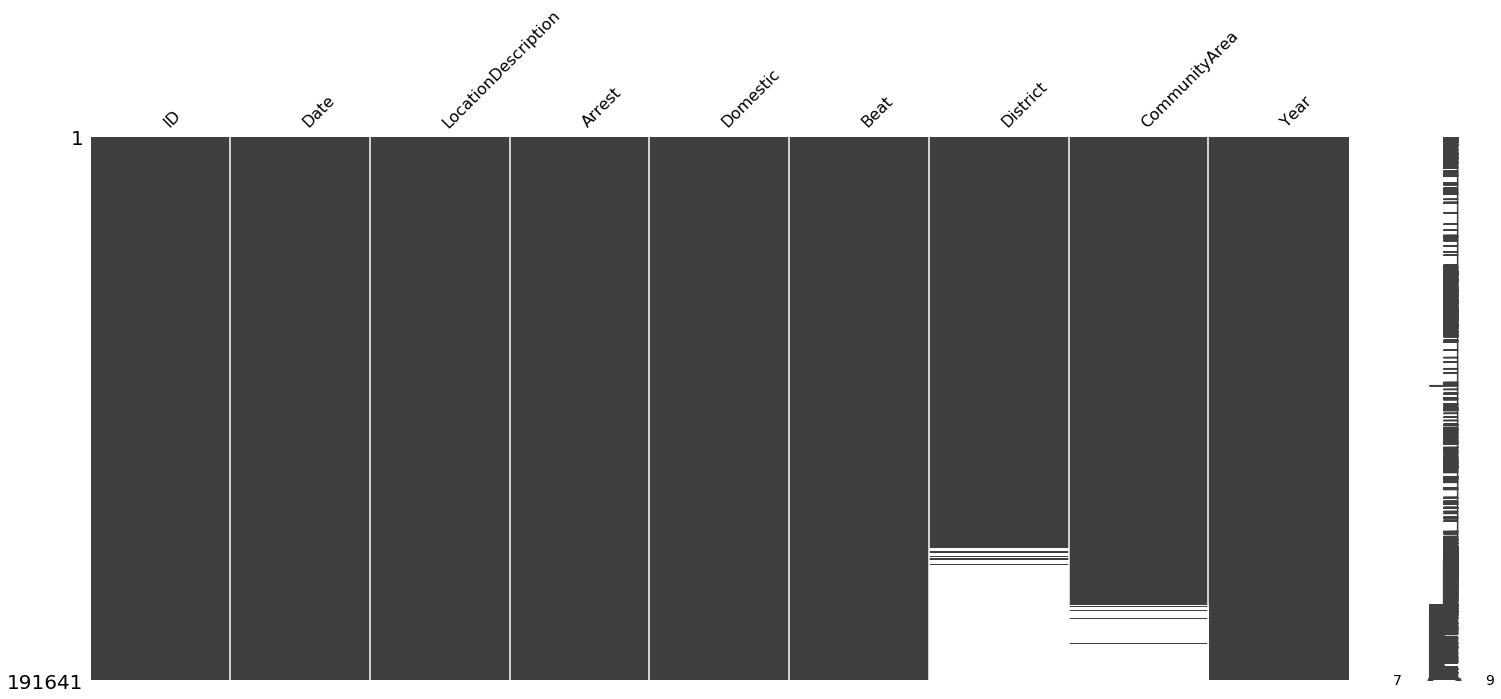

In [41]:
#Plot Where Missing Values Exist

missingno.matrix(df)

In [42]:
df['Date'].describe()

count                  191641
unique                 131680
top       2008-05-16 00:00:00
freq                       11
first     2001-01-01 00:01:00
last      2012-12-31 23:15:00
Name: Date, dtype: object

In [43]:
#Numerical Measures Data
df.describe()

,ID,Beat,Year
count,1.916410e+05,191641.000000,191641.000000
mean,4.968629e+06,1258.810771,2006.134940
std,2.342997e+06,702.530465,3.520285
min,1.310022e+06,111.000000,2001.000000
25%,2.832144e+06,722.000000,2003.000000
50%,4.762956e+06,1121.000000,2006.000000
75%,7.201878e+06,1733.000000,2009.000000
max,9.181151e+06,2535.000000,2012.000000


In [44]:
#Median of Date
df['Date'].quantile(.5)

#Method 2
dates = list(sorted(df['Date']))
dates[(len(dates)+1)//2]

Timestamp('2006-05-24 22:00:00')

In [45]:
#Create Month and Weekday Column for TimeSeries Analysis
def get_month(timestamp):
    return timestamp.month


df['Month'] = df['Date'].apply(get_month)
df['Weekday'] = pd.to_datetime(df['Date']).apply( lambda x: x.dayofweek)

Maximum Thefts is in 10 Month with 16977 Thefts


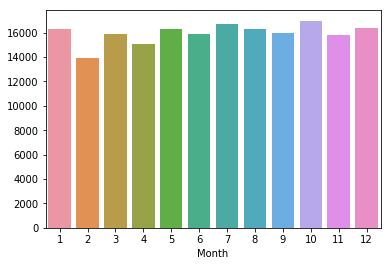

In [46]:
#Plotting month wise Motor Thefts
month_wise = df.groupby(['Month'])['ID'].count()
sns.barplot(x=month_wise.index,y=month_wise.values)
print("Maximum Thefts is in {} Month with {} Thefts".format(month_wise.idxmax(),month_wise.max()))

Maximum Thefts is in 4 weekday with 28545 Thefts


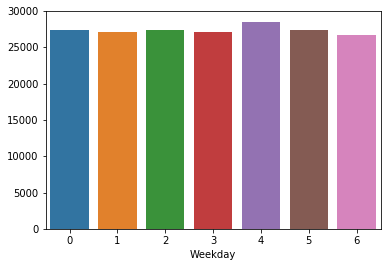

In [47]:
weekday_wise = df.groupby(['Weekday'])['ID'].count()
sns.barplot(x=weekday_wise.index,y=weekday_wise.values)
print("Maximum Thefts is in {} weekday with {} Thefts".format(weekday_wise.idxmax(),weekday_wise.max()))

In [48]:
date_df = df.set_index('Date')

In [49]:
#Number of Motor Thefts Per month Yer wise
resample_month = date_df.ID.resample('M').count()
print("The Month with Maximum Thefts From 2001-2012 is {} with {} Thefts".format(resample_month.idxmax(),resample_month.max()))

The Month with Maximum Thefts From 2001-2012 is 2001-10-31 00:00:00 with 2047 Thefts


In [50]:
#Number of Motor Thefts Buisness Weekday Year wise
resample_Bweekday = date_df.ID.resample('B').count()
print("The Weekday with Minimum Thefts From 2001-2012 is {} with {} Thefts".format(resample_Bweekday.idxmin(),resample_Bweekday.min()))

The Weekday with Minimum Thefts From 2001-2012 is 2011-02-02 00:00:00 with 14 Thefts


In [51]:
date_df

,ID,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Weekday
Date,,,,,,,,,,
2012-12-31 23:15:00,8951354,STREET,False,False,623,6,69,2012,12,0
2012-12-31 22:00:00,8951141,STREET,False,False,1213,12,24,2012,12,0
2012-12-31 22:00:00,8952745,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,0
2012-12-31 22:00:00,8952223,STREET,False,False,724,7,67,2012,12,0
2012-12-31 21:30:00,8951608,STREET,False,False,211,2,35,2012,12,0
...,...,...,...,...,...,...,...,...,...,...
2001-01-01 00:05:00,1310068,STREET,False,False,1123,NaN,NaN,2001,1,0
2001-01-01 00:01:00,1313404,STREET,False,False,2023,NaN,NaN,2001,1,0
2001-01-01 00:01:00,1313442,STREET,False,False,911,NaN,NaN,2001,1,0


In [61]:
#Motor Thefts Arrest Made From 2001 - 2012
arrest_month = df[df['Arrest']==True].groupby('Month')['ID'].count()
arrest_day = df[df['Arrest']==True].groupby('Weekday')['ID'].count()
print("Maximum Thefts occurs in {}th Month and in {}rd Weekday".format(arrest_month.idxmax(),arrest_day.idxmax()))
print("Minimum Thefts occurs in {}th Month and in {}rd Weekday".format(arrest_month.idxmin(),arrest_day.idxmin()))

Maximum Thefts occurs in 10th Month and in 4rd Weekday
Minimum Thefts occurs in 2th Month and in 3rd Weekday


C:\Users\Harshavardhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Harshavardhan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


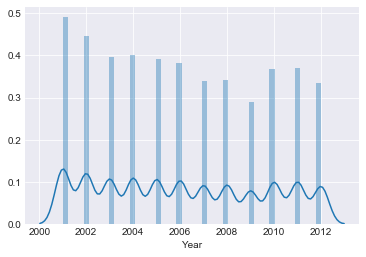

In [59]:
#It is seen that Motor Thefts Decreases as Years Passes by
sns.set_style("darkgrid")
sns.distplot(df['Year'])

C:\Users\Harshavardhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Harshavardhan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


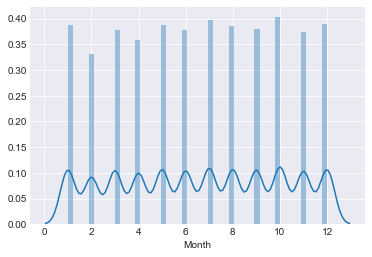

In [58]:
sns.distplot(df['Month'],norm_hist=False,)

In [62]:
Arrest_df = df[df['Arrest']==True]

Arrest_df = Arrest_df['Year'].value_counts()

In [63]:
print("{} in 2001-2006 and {} in 2007-2012 ".format(Arrest_df.loc['2001':'2006'].sum(),Arrest_df.loc['2007':'2012'].sum()))

10588 in 2001-2006 and 4948 in 2007-2012 


In [64]:
#Proportion of 2001 Arrest
df_2001 = df[df['Year']==2001]
(df_2001[df['Arrest']==True]['ID'].count())/df_2001['ID'].count()

C:\Users\Harshavardhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


0.10411727708161982

In [65]:
#Proportion of 2007 Arrest
df_2007 = df[df['Year']==2007]

(df_2007[df['Arrest']==True]['ID'].count())/df_2007['ID'].count()

C:\Users\Harshavardhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


0.08487394957983194

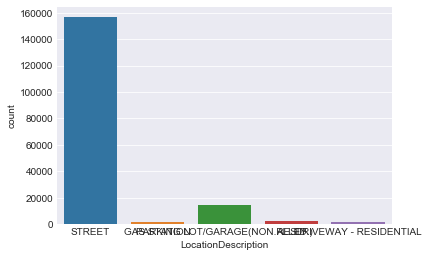

In [73]:
#Top 5 Location in Motor Thefts
df['LocationDescription'].value_counts().head(6)

top_five = ['STREET','PARKING LOT/GARAGE(NON.RESID.)','ALLEY','GAS STATION','DRIVEWAY - RESIDENTIAL']
top5 = df[df['LocationDescription'].isin(top_five)]
sns.countplot(x='LocationDescription',data=top5)

In [74]:
top5.count()

ID                     177510
Date                   177510
LocationDescription    177510
Arrest                 177510
Domestic               177510
Beat                   177510
District               137526
CommunityArea          154663
Year                   177510
Month                  177510
Weekday                177510
dtype: int64

In [75]:
top5[top5['LocationDescription']=='GAS STATION'].groupby(['Weekday'])['ID'].count()

Weekday
0    287
1    269
2    294
3    282
4    316
5    345
6    318
Name: ID, dtype: int64